In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#350um resonator parameters
Qr = 36380 
Qc = 58290
Qi = 109808
f0_orig = 800e6 #Hz

# s-domain transfer function of shunted LRC resonator
# S21(s) =  (s^2 + w0/Qi*s + w0^2 )/ (s^2 + (w0/Qi + 2w0/Qc)*s + w0^2)
# let b = w0/Qi + 2w0/Qc and c = w0^2
# roots = +/- 1/2*sqrt(b^2 - 4*c) - b/2
w0 = f0_orig*2.*np.pi
b = w0/Qi + 2*w0/Qc
c = w0**2
print(np.sqrt(abs(b**2-4*c))/2.) # calculates the natural frequency (ωn) of the resonator.
print(-b/2.) # calculates the damping ratio (ζ) of the resonator

5026548244.559211
-109121.35399271248


In [3]:
N_quiescent = 10000
N_modulated = 10000
N = N_quiescent + N_modulated
N # number of samples of the signal

20000

In [4]:
k = np.linspace( 0, N_quiescent - 1 , N_quiescent)
n = np.linspace( 0, N -1, N)

In [5]:
k # 0 to 9,999

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 9.997e+03, 9.998e+03,
       9.999e+03])

In [6]:
n # 0 to 19,999

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.9997e+04, 1.9998e+04,
       1.9999e+04])

In [7]:
df = 2e3 # Hz maximum displacement from original resonant frequency
#mod = np.arctan(np.linspace(-10,10,N))/np.pi*2*df

In [9]:
first_half = np.zeros(N//2) + f0_orig #f0_orig is the resonant frequency
first_half # this represents the first half of the frequency signal which just has the resonant frequencies

array([8.e+08, 8.e+08, 8.e+08, ..., 8.e+08, 8.e+08, 8.e+08])

In [10]:
second_half = np.ones(N//2)*df + f0_orig
second_half # this represents the second half of the frequency signal which is shifted by 2khz (2000) from the resonant frequency

array([8.00002e+08, 8.00002e+08, 8.00002e+08, ..., 8.00002e+08,
       8.00002e+08, 8.00002e+08])

In [11]:
mod = np.concatenate((np.zeros(N//2) + f0_orig, np.ones(N//2)*df + f0_orig)) # mod = modulation of the signals which is the sum of fist and second half of the frequency signals

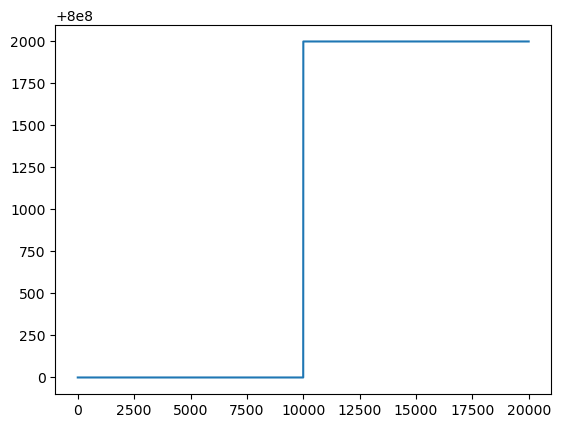

In [12]:
plt.plot(mod)

In [13]:
f0oft = mod - mod[0] + f0_orig #normalizes the generated frequency modulation by subtracting the initial frequency (mod[0]) and then adding back the original resonant frequency. 
#This step ensures that the modulation starts from the original frequency and varies around it.

In [14]:
mod

array([8.00000e+08, 8.00000e+08, 8.00000e+08, ..., 8.00002e+08,
       8.00002e+08, 8.00002e+08])

In [15]:
mod[0] # this is literally the resonant frequency of the resonator 

800000000.0

In [16]:
f0_orig

800000000.0

In [17]:
f0oft

array([8.00000e+08, 8.00000e+08, 8.00000e+08, ..., 8.00002e+08,
       8.00002e+08, 8.00002e+08])

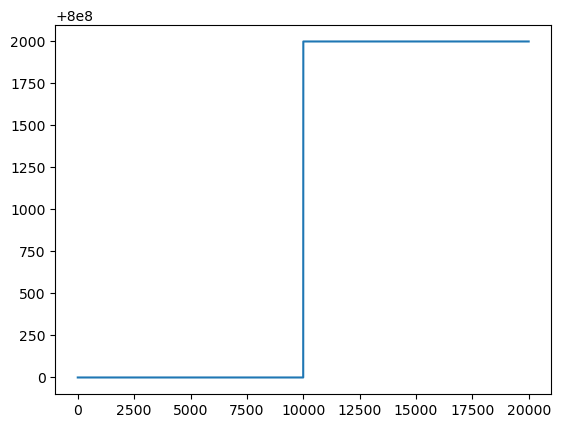

In [18]:
plt.plot(f0oft)

In [19]:
# add frequency noise
mu, sigma = 0, 400. # mean and standard deviation [Hz] this is done to add noise to the frequency seroes f0ft
s = np.random.normal(mu, sigma, N) # N= 2000 literally maintains the length
f0oft = f0oft + s # adding noise s

In [20]:
f0oft

array([7.99999728e+08, 7.99999644e+08, 8.00000114e+08, ...,
       8.00002686e+08, 8.00001825e+08, 8.00001647e+08])

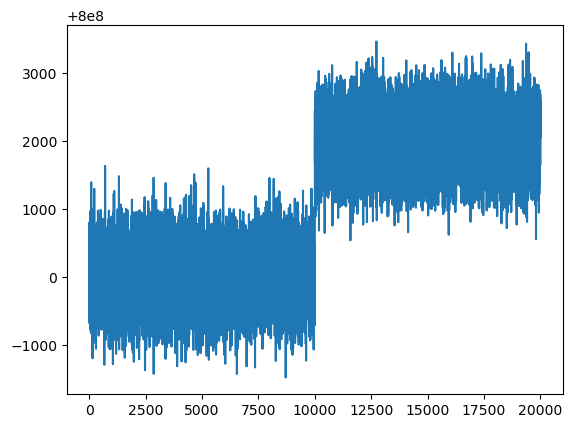

In [21]:
plt.plot(f0oft) # just shows a real world modulated signal 

In [22]:
# filter to limit frequency shifts to realistic detector bandwidth ~ 10kHz
f3dB = 10e3 # Hz , this is the realistic detector bandwidth 
f3dB #3dB cutoff frequency of the filter,

10000.0

In [23]:
Ntaps = int(np.round(500e3/f3dB/2.)) # 500e3 is twice the original sampling rate

In [24]:
Ntaps # number of filter taps (coefficients) required for the filter using the relation
# Ntaps= 500e3/f3dB
# The factor of 2 accounts for the Nyquist frequency (half the sampling frequency)

25

In [25]:
fnew = np.copy(f0oft)
fnew

array([7.99999728e+08, 7.99999644e+08, 8.00000114e+08, ...,
       8.00002686e+08, 8.00001825e+08, 8.00001647e+08])

In [26]:
np.size(f0oft)

20000

#### A loop iterates through each sample index of the original frequency series
#### For each index i, it calculates the moving average of the frequency values in a window of size Ntaps
#### fnew[i] is assigned the average value of the frequencies within the window centered around index i

In [27]:
# filter to limit frequency shifts to realistic detector bandwidth ~ 10kHz
f3dB = 10e3 # Hz
Ntaps = int(np.round(500e3/f3dB/2.))
fnew = np.copy(f0oft)
for i in range(np.size(f0oft)):  # this is the filtering loop 
    fnew[i] = np.sum(f0oft[ i : i + Ntaps ])/Ntaps

In [28]:
fnew[i]

32000065.888779014

In [29]:
# The function S21(f, f0, phi=0, A=1) is a mathematical representation of how the transmission coefficient 
#of a resonator changes concerning the input frequency deviation from its resonant frequency. 
#It models the behavior of the resonator's response in terms of phase and amplitude relative to the input signal frequency.

In [30]:
def S21(f,f0,phi=0,A=1):
  return (1.0 - Qr/Qc*(1+2*1j*Qr*(f-f0)/f0)**(-1))*np.exp(1j*phi)*A

In [31]:
#Input Parameters:
#f: Represents the frequency at which the s21 is calculated.
#f0: Denotes the resonant frequency of the resonator.
#phi=0: Optional argument representing the phase offset (default value is 0).
#A=1: Optional amplitude scaling factor (default value is 1).

In [32]:
def measS21(f_input, n):
    """
    f_input: estimated resonator frequency from tracking circuit
    n: simulation sample index
    """
    return S21(f_input,f0oft[n])

In [33]:
def estimatef0( S21new, phi_ref):
    """
    S21new: latest complex transmission measurement
    phi_ref: reference phase to compare new phase and calculate error [rad]
    returns: df_calc the frequency error [Hz]
    """
    # calculate phase error
    phi_error = phi_ref - np.arctan2(S21new.imag,S21new.real) # compare to the latest value S_21 phase is the arctan
    # proportional
    Kp = 500 #5e3 # Hz/rad
    # integral
    Ki = 50 #1e3 #1e3 # Hz/rad
    # derivative
    Kd = -10  #-10 # Hz/rad
    # sum together
    df_calc = Kp*phi_error[-1] + Ki*np.mean(phi_error) + Kd*(phi_error[-2]-phi_error[-1])
    
    return df_calc, phi_error[-1]

In [34]:
f_guesses = []
phi_error = []
df_corr = []
f_guess = f0_orig #+1e3
S21initial = measS21(f_guess,0)
phi_ref = 0#np.angle(S21initial)
L = 100 # length of integration filter in samples
S21t = np.zeros(N,dtype="complex")

In [35]:
f_guess # the resonant frequency

800000000.0

In [36]:
S21initial #depends on the 

(0.37626121593569606+0.015435764702311594j)

In [37]:
S21t

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])

In [38]:
len(S21t)

20000

In [39]:
N-L

19900

In [40]:
# Add delay from measurment to control
for m in range(N-L):
    S21t[ m + L ] = measS21(f_guess, m + L )
    df, phi_err = estimatef0(S21t[ m : m+L ],phi_ref)
    phi_error.append(phi_err)
    df_corr.append(df)
    f_guess = f_guess + df 
    f_guesses.append(f_guess)
f_guesses = np.concatenate((np.ones(L)*f0_orig,np.array(f_guesses)))

In [41]:
f_guesses

array([8.00000000e+08, 8.00000000e+08, 8.00000000e+08, ...,
       8.00002101e+08, 8.00002145e+08, 8.00002123e+08])

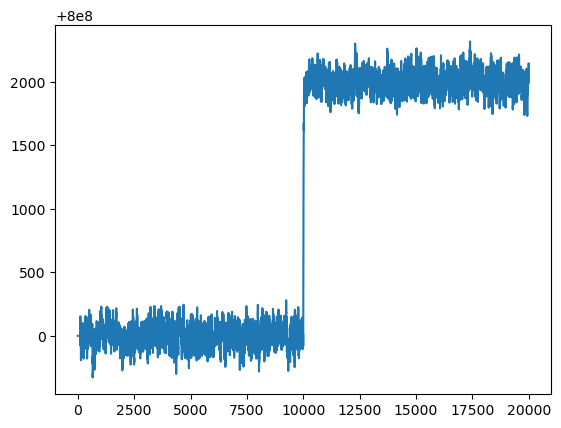

In [42]:
plt.plot(f_guesses)

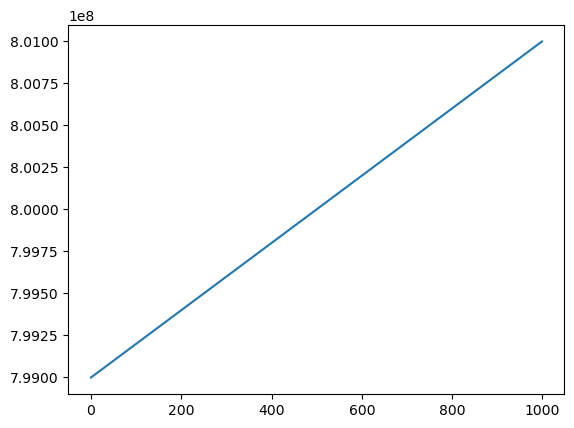

In [61]:
plt.plot(f_list), so this is the is of the all the frequencies which we are basically using for plotting the dara

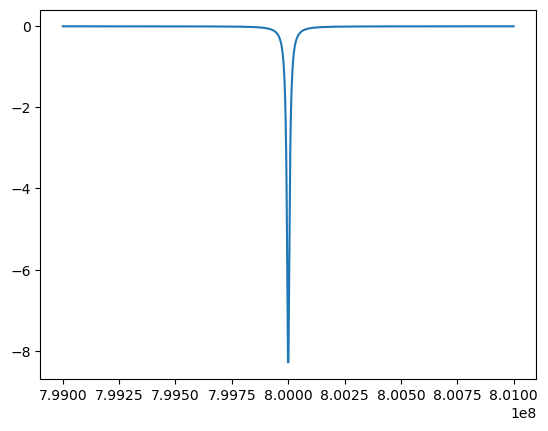

In [44]:
plt.figure()
f_list = np.linspace(f0_orig-1e6,f0_orig+1e6,1000)
plt.plot(f_list, 20.*np.log10( np.abs(S21(f_list,f0_orig,phi=0,A=1))))

In [45]:
f0oft # is the noisy frequenc signal

array([7.99999728e+08, 7.99999644e+08, 8.00000114e+08, ...,
       8.00002686e+08, 8.00001825e+08, 8.00001647e+08])

In [46]:
f0oft - f0_orig # length of 2000

array([-272.09624553, -355.56038523,  114.41559005, ..., 2685.79692435,
       1825.23054373, 1647.21947539])

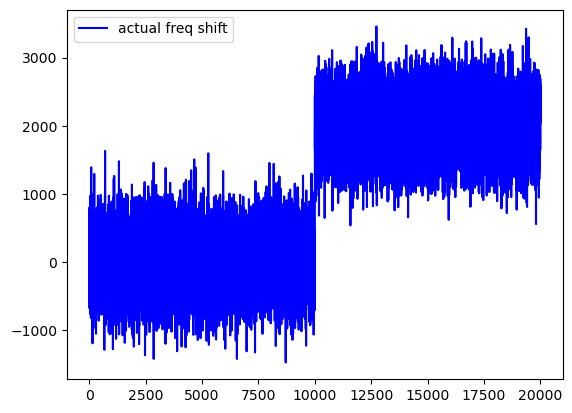

In [47]:
plt.figure()
#plt.plot(n,f0oft - f_guesses)
plt.plot(n,f0oft - f0_orig, color='blue',label='actual freq shift') # calculated from the series we created in the begininng 
plt.legend()

In [48]:
f_guesses

array([8.00000000e+08, 8.00000000e+08, 8.00000000e+08, ...,
       8.00002101e+08, 8.00002145e+08, 8.00002123e+08])

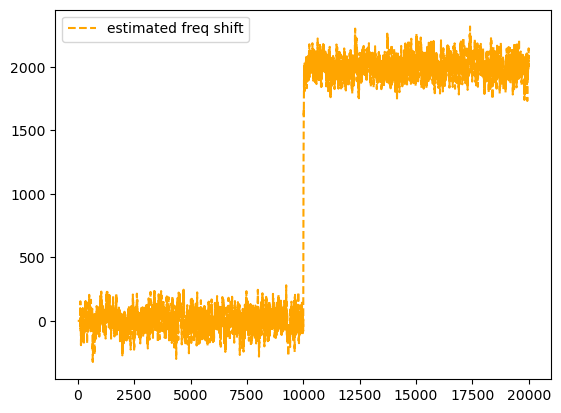

In [49]:
plt.plot(n,f_guesses - f0_orig,'--',color='orange', label='estimated freq shift') # 
plt.legend()

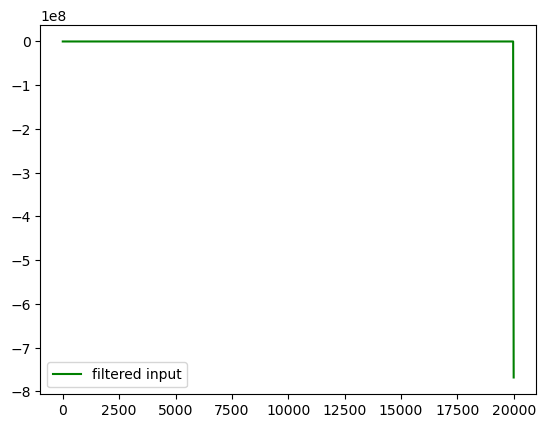

In [50]:
plt.plot(n,fnew - f0_orig,color='green',label='filtered input')
plt.legend()

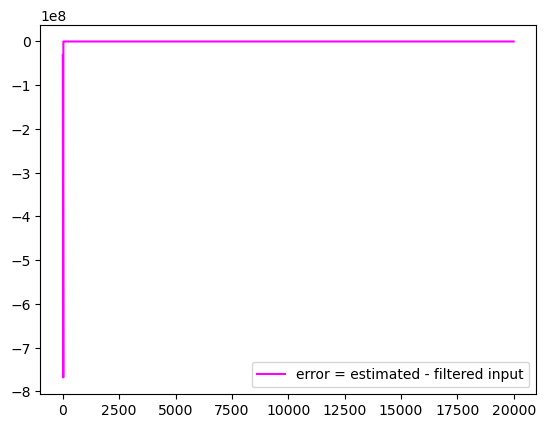

In [51]:
plt.plot(n,(np.roll(fnew,24) - f0_orig) - (f_guesses - f0_orig),color='magenta', label = "error = estimated - filtered input")
plt.legend()

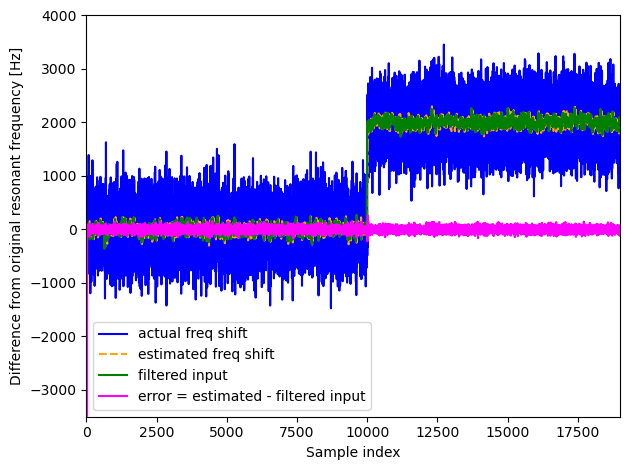

In [52]:
plt.figure()
#plt.plot(n,f0oft - f_guesses)
plt.plot(n,f0oft - f0_orig, color='blue',label='actual freq shift')
plt.plot(n,f_guesses - f0_orig,'--',color='orange', label='estimated freq shift')
#plt.plot(n,f_guesses - f0oft,'--',color='black',alpha=0.5, label='error = estimated - actual ')
plt.plot(n,fnew - f0_orig,color='green',label='filtered input')
plt.plot(n,(np.roll(fnew,24) - f0_orig) - (f_guesses - f0_orig),color='magenta', label = "error = estimated - filtered input")
plt.ylabel("Difference from original resonant frequency [Hz]")
plt.xlabel("Sample index")
plt.legend()
plt.xlim(0,19000)
plt.ylim(-3.5e3,4e3)
plt.tight_layout()

5026548244.559211
-109121.35399271248


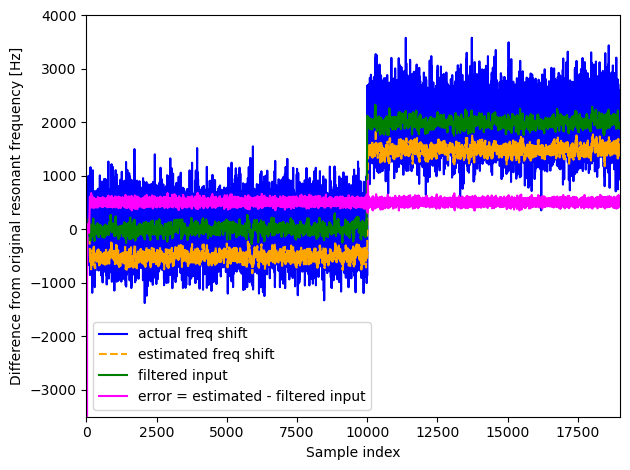

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# find frequency shift of resonator from multiplication method

# resonator parameters from BLAST-TNG in-flight
# 350um Qr = 36380 Qc = 58290 Qi = 109808 
# 250um Qr = 14085 Qc = 71355 Qi = 18693
# 500um Qr = 8881 Qc = 91638 Qi = 10347

#350um
Qr = 36380 
Qc = 58290
Qi = 109808
f0_orig = 800e6 #Hz

# s-domain transfer function of shunted LRC resonator
# S21(s) =  (s^2 + w0/Qi*s + w0^2 )/ (s^2 + (w0/Qi + 2w0/Qc)*s + w0^2)
# let b = w0/Qi + 2w0/Qc and c = w0^2
# roots = +/- 1/2*sqrt(b^2 - 4*c) - b/2
w0 = f0_orig*2.*np.pi
b = w0/Qi + 2*w0/Qc
c = w0**2
print(np.sqrt(abs(b**2-4*c))/2.)
print(-b/2.)

# 500um 
#Qr = 8881 
#Qc = 91638
#f0 = 540e6 # Hz

# Generate true resonant frequency times series
N_quiescent = 10000
N_modulated = 10000
N = N_quiescent + N_modulated
k = np.linspace( 0, N_quiescent - 1 , N_quiescent)
n = np.linspace( 0, N -1, N)
df = 2e3 # Hz maximum displacement from original resonant frequency
#mod = np.arctan(np.linspace(-10,10,N))/np.pi*2*df
mod = np.concatenate((np.zeros(N//2) + f0_orig, np.ones(N//2)*df + f0_orig))
f0oft = mod - mod[0] + f0_orig

# add frequency noise
mu, sigma = 0, 400. # mean and standard deviation [Hz]
s = np.random.normal(mu, sigma, N)
f0oft = f0oft + s

# filter to limit frequency shifts to realistic detector bandwidth ~ 10kHz
f3dB = 10e3 # Hz
Ntaps = int(np.round(500e3/f3dB/2.))
fnew = np.copy(f0oft)
for i in range(np.size(f0oft)):
    fnew[i] = np.sum(f0oft[ i : i + Ntaps ])/Ntaps


def S21(f,f0,phi=0,A=1):
  return (1.0 - Qr/Qc*(1+2*1j*Qr*(f-f0)/f0)**(-1))*np.exp(1j*phi)*A

def measS21(f_input, n):
    """
    f_input: estimated resonator frequency from tracking circuit
    n: simulation sample index
    """
    return S21(f_input,f0oft[n])

def estimatef0(S21new, phi_ref, cable_delay):
    """
    S21new: latest complex transmission measurement
    phi_ref: reference phase to compare new phase and calculate error [rad]
    cable_delay: cable delay due to resonator movement [seconds]
    returns: df_calc the frequency error [Hz]
    """
    # calculate phase error considering cable delay effect
    phi_error = phi_ref - np.arctan2(S21new.imag, S21new.real) - (2 * np.pi * cable_delay * f0_orig)
    
    # Proportional, Integral, and Derivative gains
    Kp = 500  # Proportional gain [Hz/rad]
    Ki = 50   # Integral gain [Hz/(rad * sample)]
    Kd = -10  # Derivative gain [Hz/(rad * sample)]

    # Summing up P, I, and D components for frequency error
    df_calc = Kp * phi_error[-1] + Ki * np.mean(phi_error) + Kd * (phi_error[-2] - phi_error[-1])

    return df_calc, phi_error[-1]


f_guesses = []
phi_error = []
df_corr = []
f_guess = f0_orig #+1e3
S21initial = measS21(f_guess, 0)
phi_ref = 0 # np.angle(S21initial)
cable_delay = 1.5e-11  # Example value for cable delay (adjust as needed)
L = 100  # length of integration filter in samples
S21t = np.zeros(N, dtype="complex")

# Add delay from measurement to control
for m in range(N - L):
    S21t[m + L] = measS21(f_guess, m + L)
    df, phi_err = estimatef0(S21t[m : m + L], phi_ref, cable_delay)  # Include cable_delay argument here
    phi_error.append(phi_err)
    df_corr.append(df)
    f_guess = f_guess + df 
    f_guesses.append(f_guess)
f_guesses = np.concatenate((np.ones(L) * f0_orig, np.array(f_guesses)))

%matplotlib inline
plt.figure()
#plt.plot(n,f0oft - f_guesses)
plt.plot(n,f0oft - f0_orig, color='blue',label='actual freq shift')
plt.plot(n,f_guesses - f0_orig,'--',color='orange', label='estimated freq shift')
#plt.plot(n,f_guesses - f0oft,'--',color='black',alpha=0.5, label='error = estimated - actual ')
plt.plot(n,fnew - f0_orig,color='green',label='filtered input')
plt.plot(n,(np.roll(fnew,24) - f0_orig) - (f_guesses - f0_orig),color='magenta', label = "error = estimated - filtered input")
plt.ylabel("Difference from original resonant frequency [Hz]")
plt.xlabel("Sample index")
plt.legend()
plt.xlim(0,19000)
plt.ylim(-3.5e3,4e3)
plt.tight_layout()

#### 1st iteration

5026548244.559211
-109121.35399271248


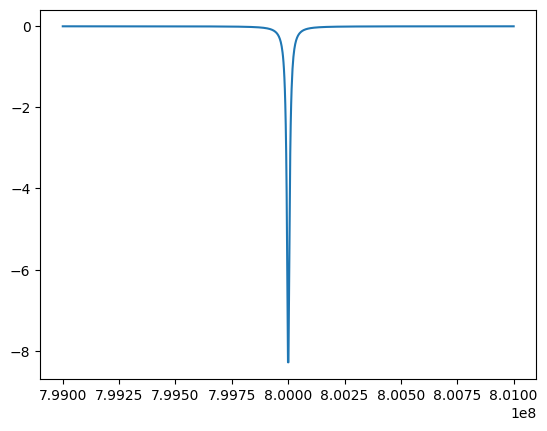

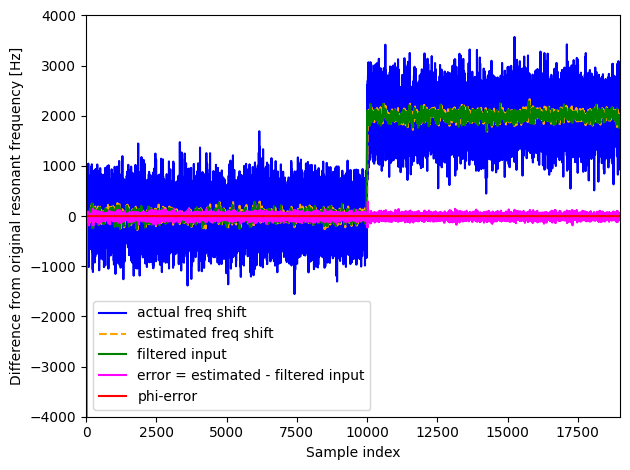

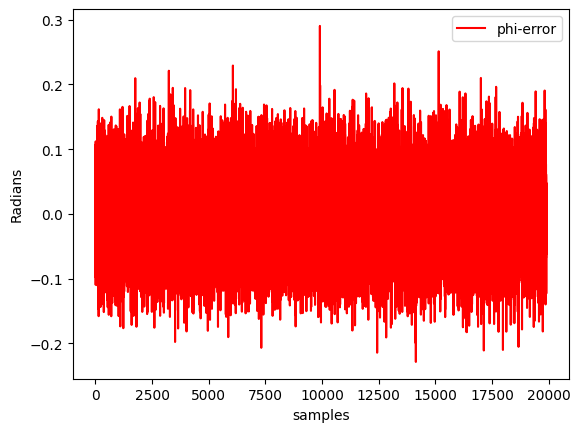

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# find frequency shift of resonator from multiplication method

# resonator parameters from BLAST-TNG in-flight
# 350um Qr = 36380 Qc = 58290 Qi = 109808 
# 250um Qr = 14085 Qc = 71355 Qi = 18693
# 500um Qr = 8881 Qc = 91638 Qi = 10347

#350um
Qr = 36380 
Qc = 58290
Qi = 109808
f0_orig = 800e6 #Hz

def initialize_phase_estimate(S21_initial, f_guess, n_initial):
    """
    S21_initial: Initial complex transmission measurement
    f_guess: Initial guess of resonator frequency
    n_initial: Number of initial samples to use for estimating phase
    returns: Initial estimate of phase [rad]
    """
    phase_estimate = np.angle(S21_initial)

    # Refine the phase estimate using more samples and considering phase continuity
    for i in range(1, n_initial):
        # Calculate phase difference between consecutive samples and accumulate
        phase_diff = np.angle(measS21(f_guess, i)) - np.angle(measS21(f_guess, i - 1))
        phase_estimate += phase_diff

    # Normalize the phase estimate by dividing by the number of samples
    phase_estimate /= n_initial

    return phase_estimate

# s-domain transfer function of shunted LRC resonator
# S21(s) =  (s^2 + w0/Qi*s + w0^2 )/ (s^2 + (w0/Qi + 2w0/Qc)*s + w0^2)
# let b = w0/Qi + 2w0/Qc and c = w0^2
# roots = +/- 1/2*sqrt(b^2 - 4*c) - b/2
w0 = f0_orig*2.*np.pi
b = w0/Qi + 2*w0/Qc
c = w0**2
print(np.sqrt(abs(b**2-4*c))/2.)
print(-b/2.)

# 500um 
#Qr = 8881 
#Qc = 91638
#f0 = 540e6 # Hz

# Generate true resonant frequency times series
N_quiescent = 10000
N_modulated = 10000
N = N_quiescent + N_modulated
k = np.linspace(0, N_quiescent - 1, N_quiescent)
n = np.linspace(0, N - 1, N)
df = 2e3  # Hz maximum displacement from original resonant frequency
mod = np.concatenate((np.zeros(N // 2) + f0_orig, np.ones(N // 2) * df + f0_orig))
f0oft = mod - mod[0] + f0_orig
# add frequency noise
mu, sigma = 0, 400. # mean and standard deviation [Hz]
s = np.random.normal(mu, sigma, N)
f0oft = f0oft + s

# filter to limit frequency shifts to realistic detector bandwidth ~ 10kHz
f3dB = 10e3  # Hz
Ntaps = int(np.round(500e3 / f3dB / 2.))
fnew = np.copy(f0oft)
for i in range(np.size(f0oft)):
    fnew[i] = np.sum(f0oft[i : i + Ntaps]) / Ntaps



def S21(f,f0,phi=0,A=1):
  return (1.0 - Qr/Qc*(1+2*1j*Qr*(f-f0)/f0)**(-1))*np.exp(1j*phi)*A

def measS21(f_input, n):
    """
    f_input: estimated resonator frequency from tracking circuit
    n: simulation sample index
    """
    return S21(f_input,f0oft[n])

def estimatef0(S21new, phi_ref, cable_delay):
    """
    S21new: latest complex transmission measurement
    phi_ref: reference phase to compare new phase and calculate error [rad]
    cable_delay: cable delay due to resonator movement [seconds]
    returns: df_calc the frequency error [Hz]
    """
    # calculate phase error considering cable delay effect
    #----------------------------------------------------------------------------------------------------------------------------
    phi_error = phi_ref - np.arctan2(S21new.imag, S21new.real) - (2 * np.pi * cable_delay * f0_orig)
    #----------------------------------------------------------------------------------------------------------------------------
    
    # Proportional, Integral, and Derivative gains
    Kp = 500  # Proportional gain [Hz/rad]
    Ki = 50   # Integral gain [Hz/(rad * sample)]
    Kd = -10  # Derivative gain [Hz/(rad * sample)]

    # Summing up P, I, and D components for frequency error
    df_calc = Kp * phi_error[-1] + Ki * np.mean(phi_error) + Kd * (phi_error[-2] - phi_error[-1])

    return df_calc, phi_error[-1]


f_guesses = []
phi_error = []
df_corr = []
f_guess = f0_orig  # +1e3 800 MHz
S21initial = measS21(f_guess, 0) # returns 1 complex S21 value corresponding to an input frequency of 800 MHz
n_initial_samples = 100  # Number of initial samples for phase estimation
#----------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------
phi_ref = initialize_phase_estimate(S21initial, f_guess, n_initial_samples) # returns an initial phase error
#----------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------


#----------------------------------------------------------------------------------------------------------------------------
cable_length = 0 #meters
per_m_cable_delay = 10e-12
#cable_delay = 1.5e-11  # Total delay for 5 meters of cable (5 ns/m * 5 m)
cable_delay = cable_length*per_m_cable_delay  # Total delay 
#----------------------------------------------------------------------------------------------------------------------------

L = 100  # Length of integration filter in samples
S21t = np.zeros(N, dtype="complex")


# Add delay from measurement to control
for m in range(N - L):
    S21t[m + L] = measS21(f_guess, m + L)
    #-------------------------------------------------------------------------------------------------------------------------
    df, phi_err = estimatef0(S21t[m : m + L], phi_ref, cable_delay)
    #-------------------------------------------------------------------------------------------------------------------------
    phi_error.append(phi_err)
    df_corr.append(df)
    f_guess = f_guess + df
    f_guesses.append(f_guess)
f_guesses = np.concatenate((np.ones(L) * f0_orig, np.array(f_guesses)))


# Plotting
plt.figure()
f_list = np.linspace(f0_orig - 1e6, f0_orig + 1e6, 1000)
plt.plot(f_list, 20. * np.log10(np.abs(S21(f_list, f0_orig, phi=0, A=1))))

plt.figure()
plt.plot(n, f0oft - f0_orig, color='blue', label='actual freq shift')
plt.plot(n, f_guesses - f0_orig, '--', color='orange', label='estimated freq shift')
plt.plot(n, fnew - f0_orig, color='green', label='filtered input')
plt.plot(n, (np.roll(fnew, 24) - f0_orig) - (f_guesses - f0_orig), color='magenta', label="error = estimated - filtered input")
plt.plot(phi_error,color="red",label= "phi-error")
plt.ylabel("Difference from original resonant frequency [Hz]")
plt.xlabel("Sample index")
plt.legend()
plt.xlim(0, 19000)
plt.ylim(-4e3, 4e3)
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(phi_error,color="red",label= "phi-error")
plt.xlabel("samples")
plt.ylabel("Radians")
plt.legend()
plt.show()

5026548244.559211
-109121.35399271248


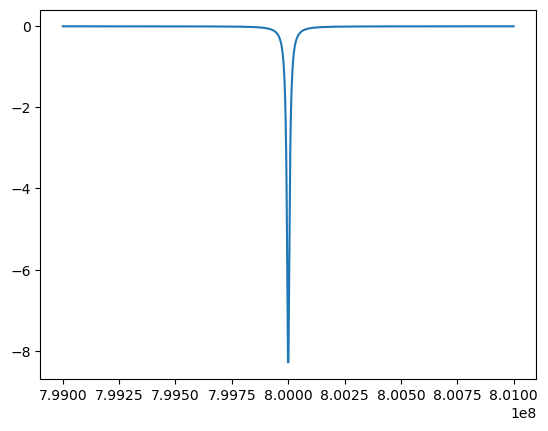

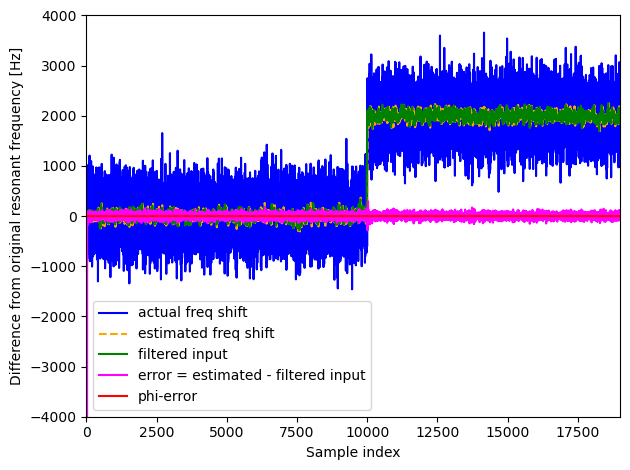

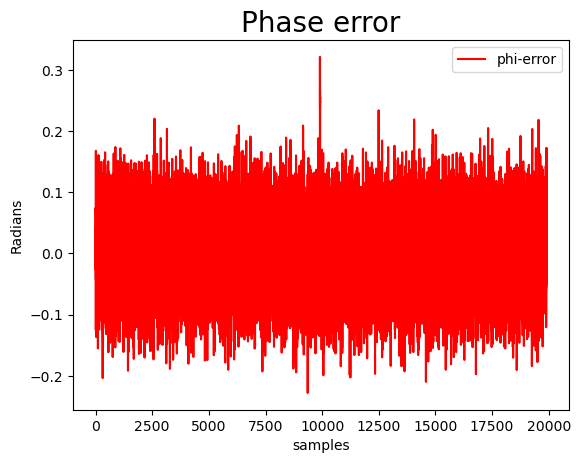

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# find frequency shift of resonator from multiplication method

# resonator parameters from BLAST-TNG in-flight
# 350um Qr = 36380 Qc = 58290 Qi = 109808 
# 250um Qr = 14085 Qc = 71355 Qi = 18693
# 500um Qr = 8881 Qc = 91638 Qi = 10347

#350um
Qr = 36380 
Qc = 58290
Qi = 109808
f0_orig = 800e6 #Hz

def initialize_phase_estimate(S21_initial, f_guess, n_initial):
    """
    S21_initial: Initial complex transmission measurement
    f_guess: Initial guess of resonator frequency
    n_initial: Number of initial samples to use for estimating phase
    returns: Initial estimate of phase [rad]
    """
    phase_estimate = np.angle(S21_initial)

    # Refine the phase estimate using more samples and considering phase continuity
    for i in range(1, n_initial):
        # Calculate phase difference between consecutive samples and accumulate
        phase_diff = np.angle(measS21(f_guess, i)) - np.angle(measS21(f_guess, i - 1))
        phase_estimate += phase_diff

    # Normalize the phase estimate by dividing by the number of samples
    phase_estimate /= n_initial

    return phase_estimate

# s-domain transfer function of shunted LRC resonator
# S21(s) =  (s^2 + w0/Qi*s + w0^2 )/ (s^2 + (w0/Qi + 2w0/Qc)*s + w0^2)
# let b = w0/Qi + 2w0/Qc and c = w0^2
# roots = +/- 1/2*sqrt(b^2 - 4*c) - b/2
w0 = f0_orig*2.*np.pi
b = w0/Qi + 2*w0/Qc
c = w0**2
print(np.sqrt(abs(b**2-4*c))/2.)
print(-b/2.)

# 500um 
#Qr = 8881 
#Qc = 91638
#f0 = 540e6 # Hz

# Generate true resonant frequency times series
N_quiescent = 10000
N_modulated = 10000
N = N_quiescent + N_modulated
k = np.linspace(0, N_quiescent - 1, N_quiescent)
n = np.linspace(0, N - 1, N)
df = 2e3  # Hz maximum displacement from original resonant frequency
mod = np.concatenate((np.zeros(N // 2) + f0_orig, np.ones(N // 2) * df + f0_orig))
f0oft = mod - mod[0] + f0_orig
# add frequency noise
mu, sigma = 0, 400. # mean and standard deviation [Hz]
s = np.random.normal(mu, sigma, N)
f0oft = f0oft + s

# filter to limit frequency shifts to realistic detector bandwidth ~ 10kHz
f3dB = 10e3  # Hz
Ntaps = int(np.round(500e3 / f3dB / 2.))
fnew = np.copy(f0oft)
for i in range(np.size(f0oft)):
    fnew[i] = np.sum(f0oft[i : i + Ntaps]) / Ntaps



def S21(f,f0,phi=0,A=1):
  return (1.0 - Qr/Qc*(1+2*1j*Qr*(f-f0)/f0)**(-1))*np.exp(1j*phi)*A

def measS21(f_input, n):
    """
    f_input: estimated resonator frequency from tracking circuit
    n: simulation sample index
    """
    return S21(f_input,f0oft[n])

def estimatef0(S21new, phi_ref, cable_delay):
    """
    S21new: latest complex transmission measurement
    phi_ref: reference phase to compare new phase and calculate error [rad]
    cable_delay: cable delay due to resonator movement [seconds]
    returns: df_calc the frequency error [Hz]
    """
    # calculate phase error considering cable delay effect
    #----------------------------------------------------------------------------------------------------------------------------
    phi_error = phi_ref - np.arctan2(S21new.imag, S21new.real) - (2 * np.pi * cable_delay * f0_orig)
    #----------------------------------------------------------------------------------------------------------------------------
    
    # Proportional, Integral, and Derivative gains
    Kp = 500  # Proportional gain [Hz/rad]
    Ki = 50   # Integral gain [Hz/(rad * sample)]
    Kd = -10  # Derivative gain [Hz/(rad * sample)]

    # Summing up P, I, and D components for frequency error
    df_calc = Kp * phi_error[-1] + Ki * np.mean(phi_error) + Kd * (phi_error[-2] - phi_error[-1])

    return df_calc, phi_error[-1]


f_guesses = []
phi_error = []
df_corr = []
f_guess = f0_orig  # +1e3 800 MHz
S21initial = measS21(f_guess, 0) # returns 1 complex S21 value corresponding to an input frequency of 800 MHz
n_initial_samples = 100  # Number of initial samples for phase estimation
#----------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------
phi_ref = initialize_phase_estimate(S21initial, f_guess, n_initial_samples) # returns an initial phase error
#----------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------


#----------------------------------------------------------------------------------------------------------------------------
cable_length = 0 #meters
per_m_cable_delay = 10e-12
#cable_delay = 1.5e-11  # Total delay for 5 meters of cable (5 ns/m * 5 m)
cable_delay = cable_length*per_m_cable_delay  # Total delay 
#----------------------------------------------------------------------------------------------------------------------------

L = 100  # Length of integration filter in samples
S21t = np.zeros(N, dtype="complex")


# Add delay from measurement to control
for m in range(N - L):
    S21t[m + L] = measS21(f_guess, m + L)
    #-------------------------------------------------------------------------------------------------------------------------
    df, phi_err = estimatef0(S21t[m : m + L], phi_ref, cable_delay)
    #-------------------------------------------------------------------------------------------------------------------------
    phi_error.append(phi_err)
    df_corr.append(df)
    f_guess = f_guess + df
    f_guesses.append(f_guess)
f_guesses = np.concatenate((np.ones(L) * f0_orig, np.array(f_guesses)))


# Plotting
plt.figure()
f_list = np.linspace(f0_orig - 1e6, f0_orig + 1e6, 1000)
plt.plot(f_list, 20. * np.log10(np.abs(S21(f_list, f0_orig, phi=0, A=1))))

plt.figure()
plt.plot(n, f0oft - f0_orig, color='blue', label='actual freq shift')
plt.plot(n, f_guesses - f0_orig, '--', color='orange', label='estimated freq shift')
plt.plot(n, fnew - f0_orig, color='green', label='filtered input')
plt.plot(n, (np.roll(fnew, 24) - f0_orig) - (f_guesses - f0_orig), color='magenta', label="error = estimated - filtered input")
plt.plot(phi_error,color="red",label= "phi-error")
plt.ylabel("Difference from original resonant frequency [Hz]")
plt.xlabel("Sample index")
plt.legend()
plt.xlim(0, 19000)
plt.ylim(-4e3, 4e3)
plt.tight_layout()
plt.show()

plt.figure()
plt.title("Phase error",size=20)
plt.plot(phi_error,color="red",label= "phi-error")
plt.xlabel("samples")
plt.ylabel("Radians")
plt.legend()
plt.show()